In [1]:
from math import pi
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
year = '2020'

In [3]:
team_totals = pd.read_csv(f'datasets/{year}/CPL Team Totals {year}.csv')
team_ref_all = pd.read_csv('datasets/teams.csv')
team_ref = team_ref_all[team_ref_all['year'] == int(year)]

In [4]:
skip_cols = ['Rank','GM','playerId','optaPersonId','teamId','optaTeamId','leagueId','league','season','seasonId','scatterId','scatterExtra']

In [52]:
#cols = [x for x in team_totals.columns if x not in skip_cols]
cols = ['team','ExpG','ExpA','BgChnc','Chance','BgChncGoal','Crosses','Key Passes','Turnover','GoalCncd','GoalCnIBx','GoalCnOBx']

In [84]:
team_dict = {'ato':['Atlético Ottawa','Atlético Ottawa'],
                 'cav':['Cavalry','Cavalry FC'],
                 'fce':['Edmonton','FC Edmonton'],
                 'for':['Forge','Forge FC'],
                 'hfx':['HFX Wanderers','HFX Wanderers FC'],
                 'pac':['Pacific','Pacific FC'],
                 'val':['Valour','Valour FC'],
                 'y9':['York9','York9 FC']}

In [85]:
lst=[]
for name in team_dict:
    tmp_lst = [x for x in team_totals[team_totals['team'] == team_dict[name][0]][cols].values[0]]
    tmp_lst[0] = team_dict[name][1]
    lst.append(tmp_lst)
totals = pd.DataFrame(lst,columns=cols)
totals

,team,ExpG,ExpA,BgChnc,Chance,BgChncGoal,Crosses,Key Passes,Turnover,GoalCncd,GoalCnIBx,GoalCnOBx
0,Atlético Ottawa,4.67,3.60,6,30,4,88,25,6,10,9,1
1,Cavalry FC,9.36,5.00,14,44,7,122,40,32,7,6,1
2,FC Edmonton,6.68,4.54,8,39,3,103,37,22,12,10,2
3,Forge FC,10.14,6.85,12,43,6,102,38,28,7,7,0
4,HFX Wanderers FC,6.54,3.82,9,40,5,77,36,14,7,4,3
5,Pacific FC,9.59,7.73,11,68,6,109,62,30,7,7,0
6,Valour FC,7.21,3.24,7,47,1,77,44,24,7,6,1
7,York9 FC,6.87,3.58,6,55,4,127,54,20,6,5,1


In [86]:
def norm(x,data):
        x = (x / data.max())
        return round(x,3)

In [87]:
def norm_data(db):
    for col in db.columns:
        if col == 'team':
            pass
        else:
            db[col] = [norm(x,db[col]) for x in db[col]]
    return db

In [88]:
team_graphs = norm_data(totals)
team_graphs

,team,ExpG,ExpA,BgChnc,Chance,BgChncGoal,Crosses,Key Passes,Turnover,GoalCncd,GoalCnIBx,GoalCnOBx
0,Atlético Ottawa,0.461,0.466,0.429,0.441,0.571,0.693,0.403,0.188,0.833,0.9,0.333
1,Cavalry FC,0.923,0.647,1.000,0.647,1.000,0.961,0.645,1.000,0.583,0.6,0.333
2,FC Edmonton,0.659,0.587,0.571,0.574,0.429,0.811,0.597,0.688,1.000,1.0,0.667
3,Forge FC,1.000,0.886,0.857,0.632,0.857,0.803,0.613,0.875,0.583,0.7,0.000
4,HFX Wanderers FC,0.645,0.494,0.643,0.588,0.714,0.606,0.581,0.438,0.583,0.4,1.000
5,Pacific FC,0.946,1.000,0.786,1.000,0.857,0.858,1.000,0.938,0.583,0.7,0.000
6,Valour FC,0.711,0.419,0.500,0.691,0.143,0.606,0.710,0.750,0.583,0.6,0.333
7,York9 FC,0.678,0.463,0.429,0.809,0.571,1.000,0.871,0.625,0.500,0.5,0.333


In [89]:
FACE, EDGE = '#343148','#565177'
plt.rcParams['text.color'] = EDGE
plt.rcParams['font.size'] = 26
plt.rcParams['xtick.color'] = EDGE
plt.rcParams['ytick.color'] = EDGE
plt.rcParams['axes.edgecolor'] = EDGE
plt.rcParams['figure.max_open_warning'] = 0
plt.rcParams['figure.autolayout'] = True

team_colour = [['#ffffff','#E4002B'],
               ['#ffffff','#DA291C'],
               ['#ffffff','#004C97'],
               ['#ffffff','#DE4405'],
               ['#302117','#41B6E6'],
               ['#ffffff','#582C83'],
               ['#ffffff','#7C2529'],
               ['#302117','#78BE20']]

In [93]:
def make_radar(data,team_ref,year,team_colour):
    
    team = data['team']
    info = team_ref[team_ref['team'] == team]
    colour_index = info.index.values[0]
    colour1 = info['colour1'].values[0]
    colour2 = info['colour2'].values[0]
    
    plt.rcParams['text.color'] = team_colour[colour_index][0]
    plt.rcParams['font.size'] = 42
    plt.rcParams['xtick.color'] = team_colour[colour_index][0]
    plt.rcParams['ytick.color'] = team_colour[colour_index][0]
    plt.rcParams['axes.edgecolor'] = team_colour[colour_index][0]
    
    # number of variable
    categories=list(team_graphs)[1:]
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = data.drop('team').values.flatten().tolist()
    values += values[:1]
    values

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    #plt.figure(figsize=(8,8))
    plt.figure(figsize=(8,8), dpi=80, facecolor=team_colour[colour_index][1],edgecolor=team_colour[colour_index][0])
    ax = plt.subplot(111, polar=True)
    ax.set_facecolor(team_colour[colour_index][1])

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color=team_colour[colour_index][0], size=20)

    # Draw ylabels
    #ax.set_title(data['team'], color=colour2, size=24)
    ax.set_rlabel_position(0)
    plt.yticks([0.25,0.5,0.75], ["0.25","0.50","0.75"], color=team_colour[colour_index][0], size=12)
    plt.ylim(0,1)
    # Plot data
    ax.plot(angles, values, linewidth=8, linestyle='solid', color=colour2)

    # Fill area
    ax.fill(angles, values, colour2, alpha=0.5)
    
    filename = f'static/images/{year}/cpl-{year}-{team}-radar.png'
    #plt.savefig(filename, facecolor= team_colour[colour_index][1],edgecolor=team_colour[colour_index][0])

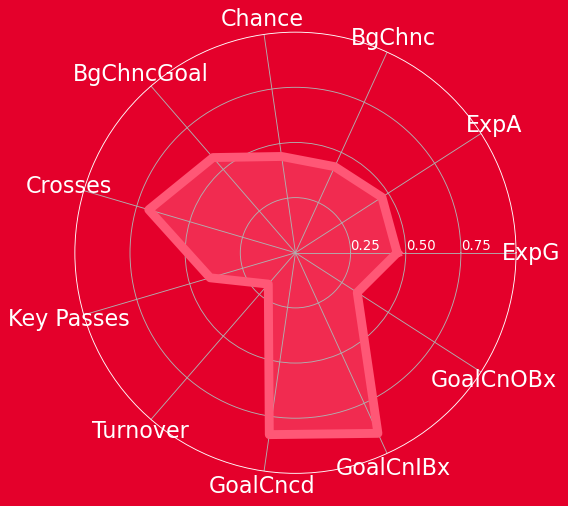

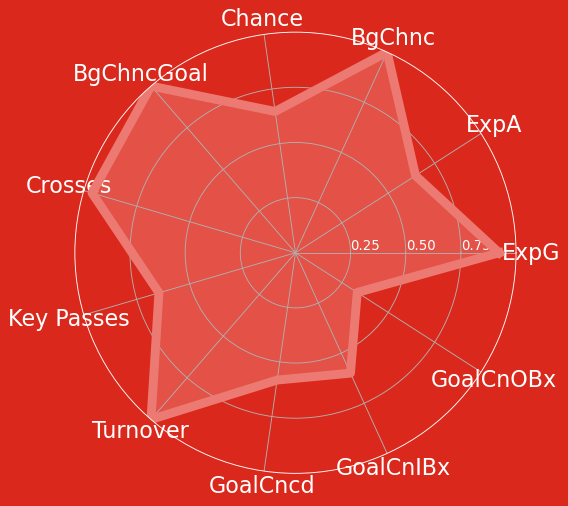

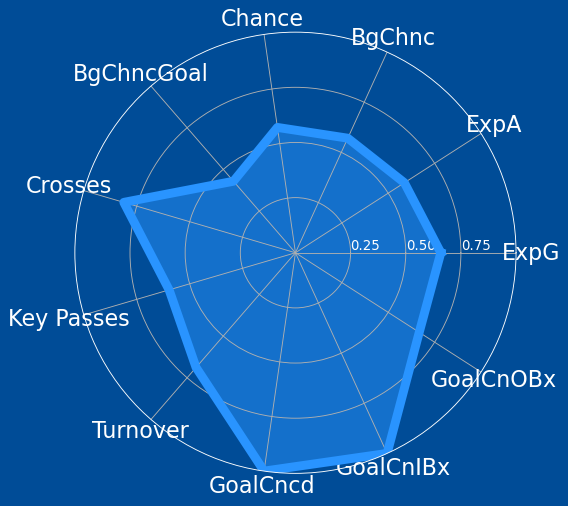

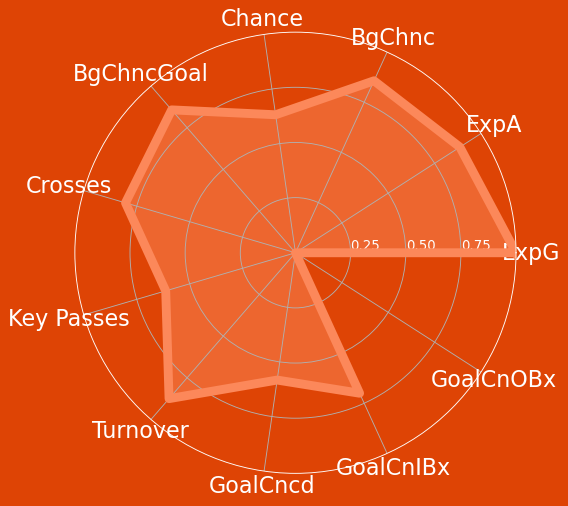

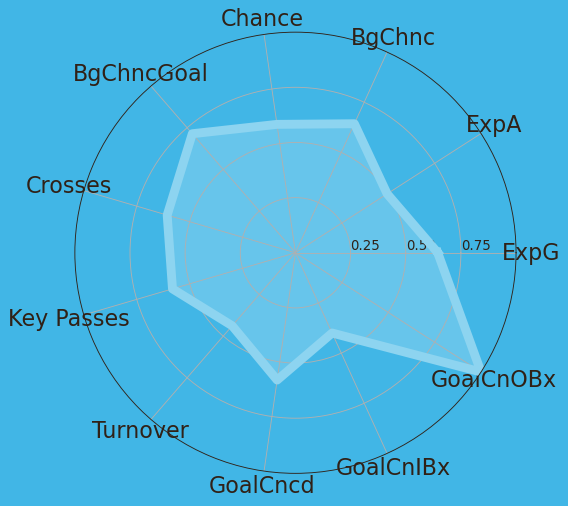

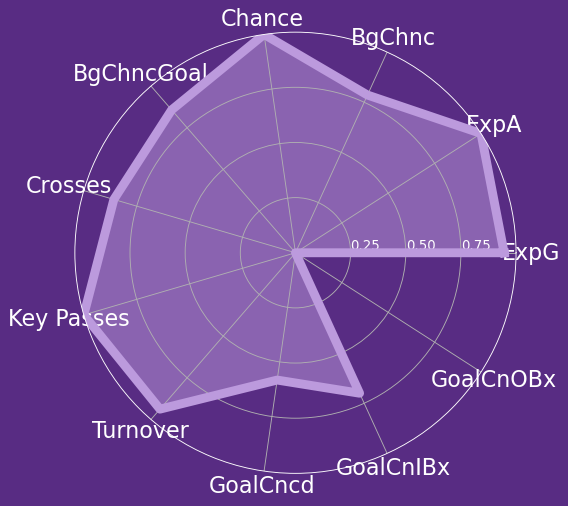

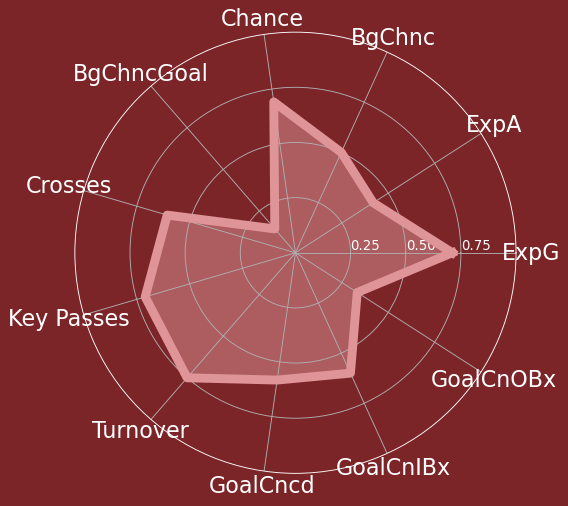

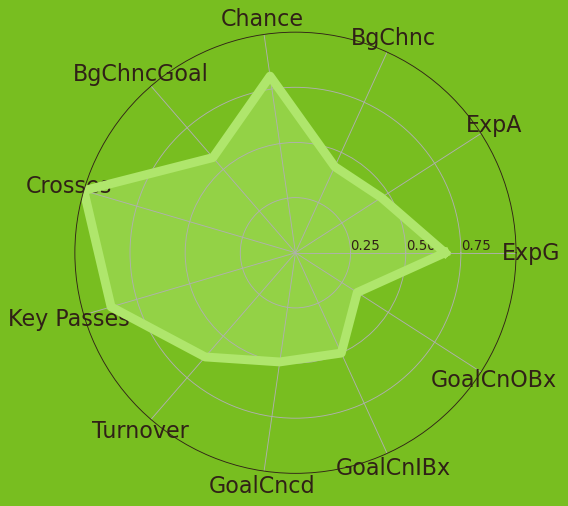

In [94]:
for i in range(team_graphs.shape[0]):
    make_radar(team_graphs.loc[i],team_ref,year,team_colour)